In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import colormaps as cm
from matplotlib import colors

In [2]:
production_wells_df = pd.read_csv('res21_2D_wells.csv', 
                                  index_col='Well_ID')
production_wells_df 

#preproduction_wells_df = pd.read_csv('', #index_col='Well_ID')

,X,Y,Por,Perm,AI,Density,PVel,Youngs,SVel,Shear,CumulativeOil
Well_ID,,,,,,,,,,,
1,7325.0,7175.0,13.564033,NaN,7.214987,2.153530,3379.255305,25.875998,1658.612455,NaN,847.33
2,4225.0,3525.0,12.907730,133.910637,7.308846,2.146360,3563.549461,25.688560,1673.770439,6.429229,1201.20
3,7725.0,8275.0,12.110566,104.059282,7.366451,1.919698,3882.442911,NaN,1675.645601,5.674798,781.40
4,4425.0,6475.0,13.990654,139.915993,7.286771,1.980721,3688.351168,27.125611,NaN,5.408664,1573.20
5,2125.0,1225.0,12.982720,NaN,7.333877,1.928716,3777.566423,28.133694,NaN,5.265054,548.68
...,...,...,...,...,...,...,...,...,...,...,...
69,3375.0,775.0,12.323650,105.228380,7.391037,1.903947,4039.819037,29.487929,1677.211387,NaN,1320.10
70,3575.0,9775.0,13.532038,149.422149,7.303712,2.278235,3264.919661,NaN,1681.926637,6.714150,1022.10
71,6975.0,6525.0,13.534951,125.424280,7.223278,2.069715,3637.282621,NaN,1656.076815,5.650985,998.59


In [3]:
production_well_locations = production_wells_df[['X', 'Y']]
production_well_locations  

,X,Y
Well_ID,,
1,7325.0,7175.0
2,4225.0,3525.0
3,7725.0,8275.0
4,4425.0,6475.0
5,2125.0,1225.0
...,...,...
69,3375.0,775.0
70,3575.0,9775.0
71,6975.0,6525.0


In [4]:
ai = np.load('res21_ai_map.npy')
ai

array([[7330745.12202422, 7331760.53488938, 7334060.40454262, ...,
        7497094.21929584, 7497790.23583703, 7498039.48550125],
       [7333197.5232591 , 7336590.44627886, 7340141.09219594, ...,
        7492364.35635126, 7493427.2356891 , 7491384.0372257 ],
       [7339554.15399274, 7339822.34125162, 7346433.56267525, ...,
        7490250.82347288, 7490639.03251509, 7489313.08234804],
       ...,
       [7339324.42321982, 7338370.27392434, 7337808.91653805, ...,
        7479945.20093714, 7480506.61698691, 7480261.31217404],
       [7337509.51722756, 7335284.93613764, 7334043.33226672, ...,
        7482532.65559477, 7482650.45830715, 7481127.24688628],
       [7334441.44000326, 7334579.45702932, 7332046.40679101, ...,
        7484917.88347116, 7484380.25223172, 7484013.64450351]])

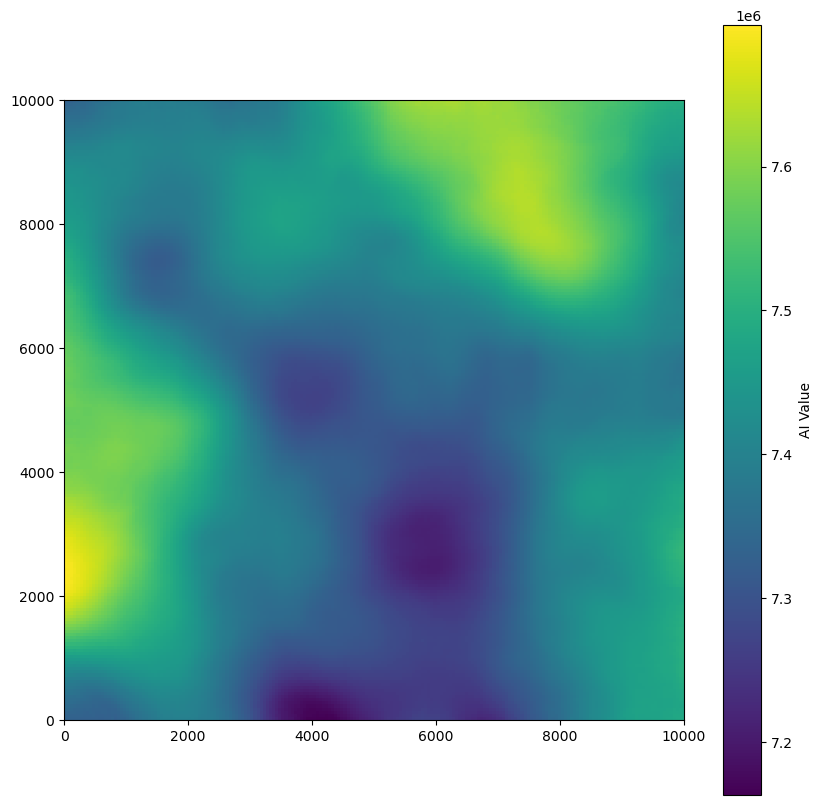

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Create a proper normalization for your data
vmin, vmax = ai.min(), ai.max()  # Get actual data range
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# Apply the normalization to the image
im = ax.imshow(ai, cmap='viridis', extent=(0, 10000, 0, 10000), norm=norm)

# Create a colorbar with the same normalization
cbar = fig.colorbar(im)
cbar.set_label('AI Value')  # Add a label to clarify what the colorbar represents

In [6]:
px = production_well_locations['X'].to_numpy()
py = -production_well_locations['Y'].to_numpy() + 10000

In [7]:
py

array([2825., 6475., 1725., 3525., 8775., 5475., 1975., 1325., 4525.,
       8425., 4325., 6225., 1125., 1775., 4125.,  525., 3725., 7625.,
       3075., 7825., 2875., 4875., 1375., 2375., 8625., 4275., 5225.,
       3325., 8175., 3125., 6175., 2175., 4075., 5825., 7225., 2625.,
       1575., 7925., 5175., 6625., 1675., 2625.,  575., 4025., 6875.,
       1175., 3075., 3275., 4425., 6375., 9025.,  775., 3875., 5625.,
       2375., 1475., 4875., 3025., 6675., 3675., 5375., 7225., 1875.,
       1175., 3475., 4625., 2075., 5575., 9225.,  225., 3475., 7375.,
       2475.])

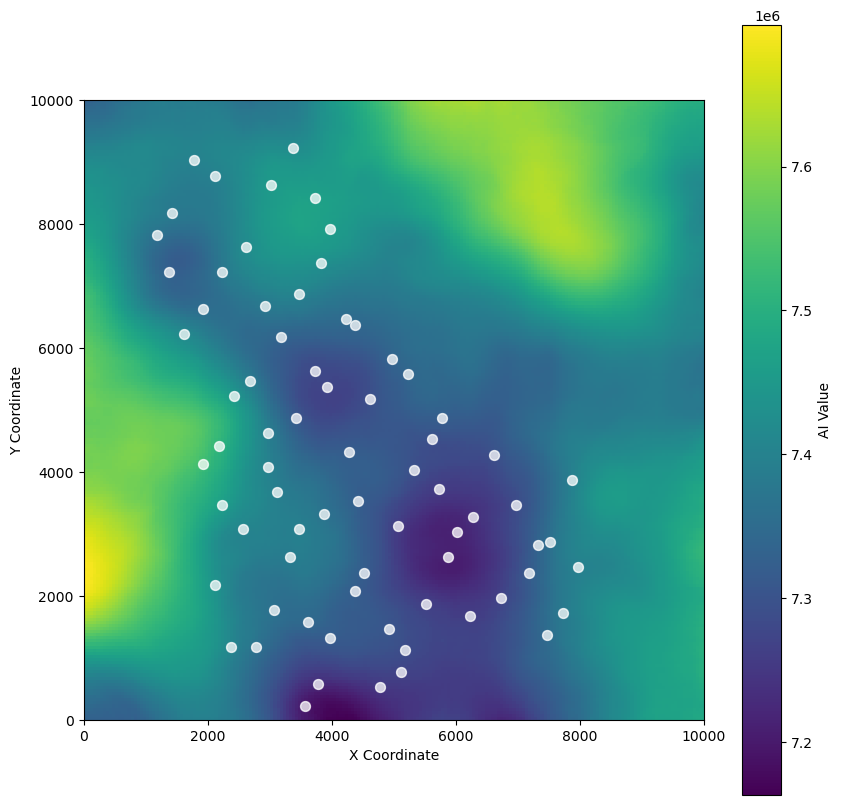

In [11]:
ax.scatter(px, py, color='w', marker='o', alpha=0.5, s=50)
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
display(fig)